<a href="https://colab.research.google.com/github/polinakochneva1/me_labs_house/blob/main/%D0%B3%D0%B5%D0%BE%D1%80%D0%B3%D0%B8%D0%B9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/winemag_dataset.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


**Unnamed:** Тут просто повторяется нумерация, так что мы потом снесем эту колонку, она нам не дает никакой информации

**country:** Страна, из которой произведено вино

**description:** Описание(запах, вкус)

**designation:**	Виноградник на территории винодельни, откуда взят виноград, из которого изготовлено вино

**points:**	Количество баллов, на которые винный энтузиаст оценил вино

**price:**	Стоимость бутылки вина

**province:**	Провинция или штат, из которого произведено вино

**region_1:**	Винодельческий район в провинции или штате (например, Напа)

**region_2:**	Иногда в пределах винодельческого района указываются более конкретные регионы (например, Резерфорд в долине Напа), но иногда это значение может быть пустым

**taster_name:** Название вина

**taster_twitter_handle:** Аккаунт в твитере

**title:** Название обзора вина, в котором часто указывается год сбора винограда, если вы заинтересованы в извлечении этой характеристики

**variety:** Сорт винограда, используемый для приготовления вина (например, Пино Нуар)

**winery:** Винодельня, на которой производилось вино

In [3]:
df = df.drop(columns = ['Unnamed: 0','description','designation','region_1','region_2','taster_name','taster_twitter_handle','title','variety','winery'])
#Тут мы удалили все столбцы, которые нам не давали никакой нужной инфы
df

,country,points,price,province
0,Italy,87,NaN,Sicily & Sardinia
1,Portugal,87,15.0,Douro
2,US,87,14.0,Oregon
3,US,87,13.0,Michigan
4,US,87,65.0,Oregon
...,...,...,...,...
36164,Austria,92,20.0,Eisenberg
36165,US,88,20.0,California
36166,US,88,32.0,California
36167,Italy,88,18.0,Sicily & Sardinia


In [4]:
df.describe()

,points,price
count,36169.000000,33541.000000
mean,88.397274,34.928177
std,3.002518,39.293602
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,2500.000000


In [5]:
df['price'] = df['price'].apply(lambda x: 'Вери дешево' if x<=10.0 else 'Норм пойло' if x>10.0 and x<35.0 else 'Вери гуд бухлишко' if x>=35.0 else x)

In [6]:
df

,country,points,price,province
0,Italy,87,NaN,Sicily & Sardinia
1,Portugal,87,Норм пойло,Douro
2,US,87,Норм пойло,Oregon
3,US,87,Норм пойло,Michigan
4,US,87,Вери гуд бухлишко,Oregon
...,...,...,...,...
36164,Austria,92,Норм пойло,Eisenberg
36165,US,88,Норм пойло,California
36166,US,88,Норм пойло,California
36167,Italy,88,Норм пойло,Sicily & Sardinia


In [7]:
df['price'] = df['price']. fillna ('Норм пойло')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36169 entries, 0 to 36168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   36153 non-null  object
 1   points    36169 non-null  int64 
 2   price     36169 non-null  object
 3   province  36153 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [9]:
df = df.dropna()
df
#Удалям наны

,country,points,price,province
0,Italy,87,Норм пойло,Sicily & Sardinia
1,Portugal,87,Норм пойло,Douro
2,US,87,Норм пойло,Oregon
3,US,87,Норм пойло,Michigan
4,US,87,Вери гуд бухлишко,Oregon
...,...,...,...,...
36164,Austria,92,Норм пойло,Eisenberg
36165,US,88,Норм пойло,California
36166,US,88,Норм пойло,California
36167,Italy,88,Норм пойло,Sicily & Sardinia


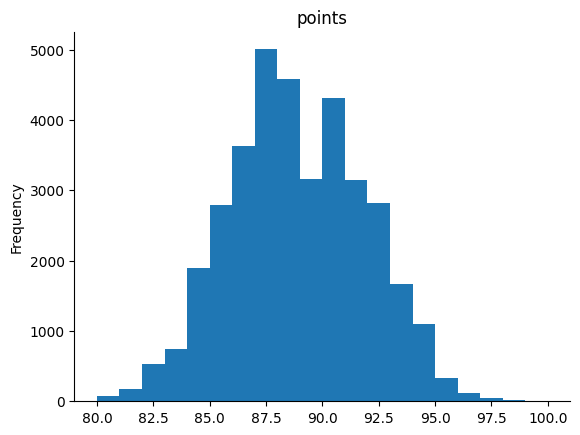

In [ ]:
# @title points

from matplotlib import pyplot as plt
df['points'].plot(kind='hist', bins=20, title='points')
plt.gca().spines[['top', 'right',]].set_visible(False)

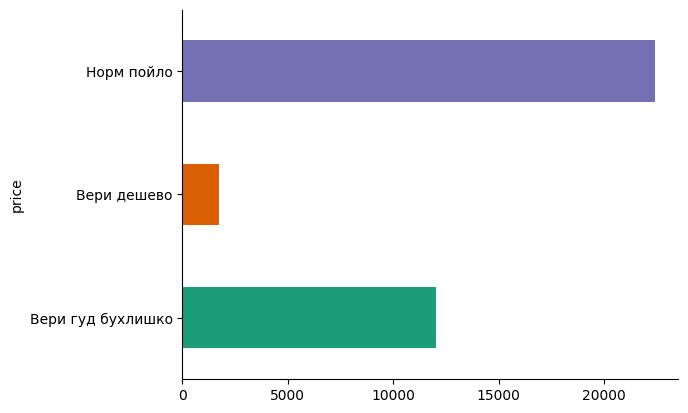

In [ ]:
# @title price

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('price').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36153 entries, 0 to 36168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   36153 non-null  object
 1   points    36153 non-null  int64 
 2   price     36153 non-null  object
 3   province  36153 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [11]:
X=df.drop(columns=['price'])
Y = df['price']
X

,country,points,province
0,Italy,87,Sicily & Sardinia
1,Portugal,87,Douro
2,US,87,Oregon
3,US,87,Michigan
4,US,87,Oregon
...,...,...,...
36164,Austria,92,Eisenberg
36165,US,88,California
36166,US,88,California
36167,Italy,88,Sicily & Sardinia


**2.**


In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [13]:
#Делаем стандартизацию и лэйбл(он для статсмоделей)
scaler = MinMaxScaler()
le = LabelEncoder()
X[['points']] = scaler.fit_transform(X[['points']])
X['country'] = le.fit_transform(X['country'])
X['province'] = le.fit_transform(X['province'])
Y=le.fit_transform(Y)

In [14]:
#Выводим коэф параметров регрессии

X = sm.add_constant(X)
mod = sm.OLS(Y.astype(float),X.astype(float))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     2876.
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        05:19:49   Log-Likelihood:                -44889.
No. Observations:               36153   AIC:                         8.979e+04
Df Residuals:                   36149   BIC:                         8.982e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5611      0.017    148.036      0.000       2.527       2.595
country       -0.0099      0.000    -28.244      0.000      -0.011      -0.009
points        -2.5569      0.029    -87.134      0.000      -2.614      -2.499
province       0.0004   3.97e-05      9.676      0.000       0.000       0.000
==============================================================================
Omnibus:                    18363.408   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2849.134
Skew:                          -0.396   Prob(JB):                         0.00
Kurtosis:                       1.876   Cond. No.                     1.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Все значимы так как p-value везде меньше 0.05

**3.**



In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [16]:
clf_final = LogisticRegression(penalty='l2',C=0.1,solver='lbfgs',max_iter=10000)

**4.**

In [17]:
model_lr = LogisticRegression()
model_rfc = RandomForestClassifier()
model_knn = KNeighborsClassifier(n_neighbors=10)

In [18]:
X=df.drop(columns=['price'])
Y = df['price']
Y=le.fit_transform(Y)
X[['points']] = scaler.fit_transform(X[['points']])
X=pd.get_dummies (X, columns=['country','province'])

In [19]:
X

,points,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Canada,country_Chile,...,province_Weinviertel,province_Wellington,province_Western Australia,province_Western Cape,province_Wiener Gemischter Satz,province_Württemberg,province_Zenata,province_Österreichischer Sekt,province_Štajerska,province_Župa
0,0.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36164,0.60,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36165,0.40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36166,0.40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36167,0.40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
#Делим на тест и трэин для обучения и проверки
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

**5.**

In [22]:
#Обучаем
model_lr=model_lr.fit(X_train,y_train)
model_rfc=model_rfc.fit(X_train,y_train)
model_knn=model_knn.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)
y_pred_rfc = model_rfc.predict(X_test)
y_pred_knn = model_knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns

In [24]:
#Точность
ac_lr=accuracy_score(y_test,y_pred_lr)
ac_rfc=accuracy_score(y_test,y_pred_rfc)
ac_knn=accuracy_score(y_test,y_pred_knn)
ac_lr,ac_rfc,ac_knn


(0.7325281209662549, 0.7320671215194542, 0.7198045362345565)

In [25]:
#Выводим сразу отчет классификации, чтобы сравнить рекол и зкуцишион
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.70      0.59      0.64      3631
           1       0.67      0.12      0.20       531
           2       0.75      0.86      0.80      6684

    accuracy                           0.73     10846
   macro avg       0.71      0.52      0.55     10846
weighted avg       0.73      0.73      0.72     10846



In [26]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.70      0.58      0.64      3631
           1       0.60      0.20      0.30       531
           2       0.75      0.86      0.80      6684

    accuracy                           0.73     10846
   macro avg       0.68      0.55      0.58     10846
weighted avg       0.72      0.73      0.72     10846



In [27]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.67      0.61      0.64      3631
           1       0.53      0.20      0.29       531
           2       0.75      0.82      0.78      6684

    accuracy                           0.72     10846
   macro avg       0.65      0.54      0.57     10846
weighted avg       0.71      0.72      0.71     10846



Логистическая модель лучшая

**6.**

In [28]:
cf_matrix = confusion_matrix(y_test,y_pred_lr)

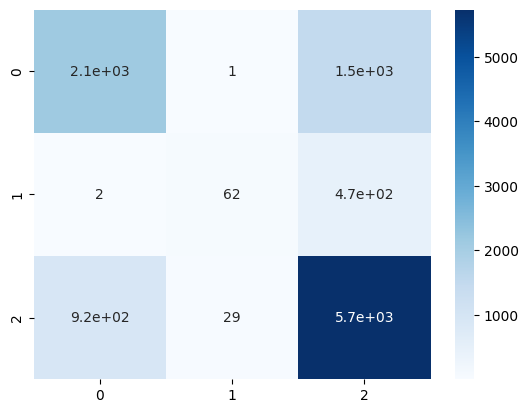

In [29]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

In [30]:
cf_matrix

array([[2149,    1, 1481],
       [   2,   62,  467],
       [ 921,   29, 5734]])

**7.**

In [31]:
from sklearn.tree import DecisionTreeClassifier
tree_cla = DecisionTreeClassifier(max_depth = 5)
tree_cla= tree_cla.fit(X_train,y_train)
y_pred_tree=tree_cla.predict(X_test)

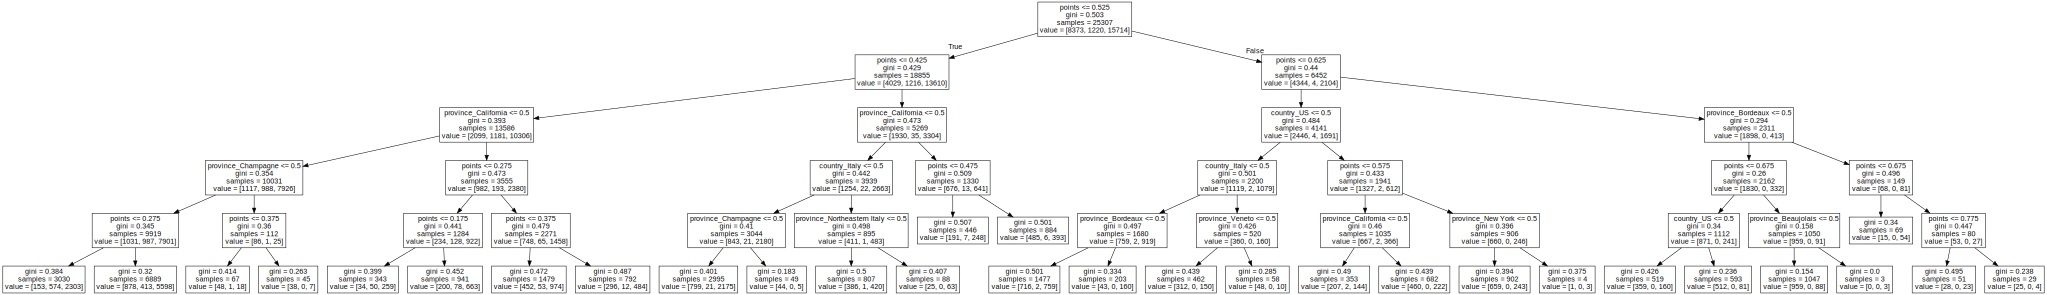

In [32]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(tree_cla, out_file=None, feature_names=X.columns))

Если поинт больше чем 0.525 то идет вправо, если между 0.525 и 0.575 то вниз

**Доп баллы**

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_pca=pca.fit_transform(X)

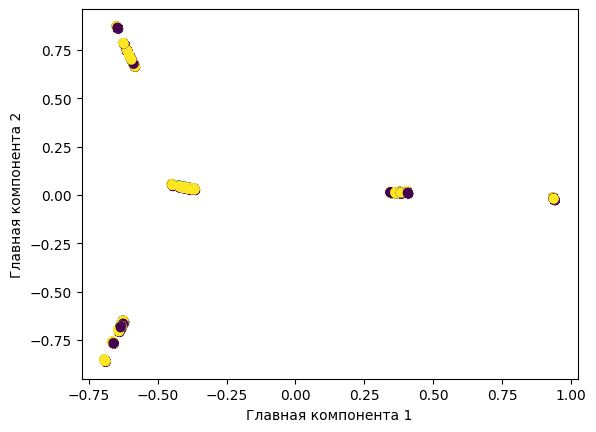

In [34]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis')
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.show()

**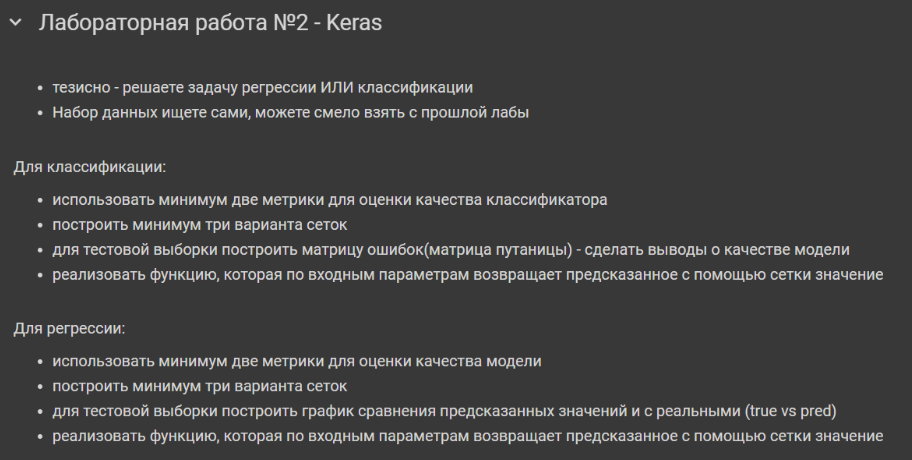**

In [35]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical

In [51]:
y = to_categorical(Y) #превращаем в кучу столбцов

In [47]:
#разделение выборок
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=0)

In [48]:
#создание модели с помощью Sequential
model = keras.models.Sequential()

#добавляем слои в модель
model.add(Dense(500, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

#компилируем модель
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy","F1Score"])

#обучение модели
history=model.fit(X_train, y_train, epochs =5,batch_size=5)

Epoch 1/5
4628/4628 [==============================] - 35s 7ms/step - loss: 0.6434 - accuracy: 0.7110 - f1_score: 0.4665
Epoch 2/5
4628/4628 [==============================] - 37s 8ms/step - loss: 0.6077 - accuracy: 0.7273 - f1_score: 0.5195
Epoch 3/5
4628/4628 [==============================] - 26s 6ms/step - loss: 0.6032 - accuracy: 0.7279 - f1_score: 0.5242
Epoch 4/5
4628/4628 [==============================] - 24s 5ms/step - loss: 0.5973 - accuracy: 0.7335 - f1_score: 0.5426
Epoch 5/5
4628/4628 [==============================] - 26s 6ms/step - loss: 0.5936 - accuracy: 0.7337 - f1_score: 0.5398


In [39]:
model1 = keras.models.Sequential()
model1.add(Dense(512, activation='relu', input_dim=X_train.shape[1]))
model1.add(Dense(y.shape[1], activation='softmax'))
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy","F1Score"])
history=model1.fit(X_train, y_train, epochs =20,batch_size=32)

Epoch 1/20
724/724 [==============================] - 9s 10ms/step - loss: 0.6566 - accuracy: 0.7067 - f1_score: 0.4639
Epoch 2/20
724/724 [==============================] - 5s 6ms/step - loss: 0.6004 - accuracy: 0.7310 - f1_score: 0.5339
Epoch 3/20
724/724 [==============================] - 3s 4ms/step - loss: 0.5946 - accuracy: 0.7334 - f1_score: 0.5537
Epoch 4/20
724/724 [==============================] - 3s 4ms/step - loss: 0.5906 - accuracy: 0.7342 - f1_score: 0.5533
Epoch 5/20
724/724 [==============================] - 4s 6ms/step - loss: 0.5880 - accuracy: 0.7330 - f1_score: 0.5538
Epoch 6/20
724/724 [==============================] - 4s 5ms/step - loss: 0.5858 - accuracy: 0.7373 - f1_score: 0.5550
Epoch 7/20
724/724 [==============================] - 3s 5ms/step - loss: 0.5843 - accuracy: 0.7362 - f1_score: 0.5571
Epoch 8/20
724/724 [==============================] - 3s 5ms/step - loss: 0.5825 - accuracy: 0.7379 - f1_score: 0.5642
Epoch 9/20
724/724 [===========================

In [40]:
model2 = keras.models.Sequential()
model2.add(Dense(512, activation='relu', input_dim=X_train.shape[1]))
model2.add(Dropout(0.2))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(y.shape[1], activation='softmax'))
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy","F1Score"])
history=model2.fit(X_train, y_train, epochs =10,batch_size=8)

Epoch 1/10
2893/2893 [==============================] - 21s 7ms/step - loss: 0.6417 - accuracy: 0.7090 - f1_score: 0.4874
Epoch 2/10
2893/2893 [==============================] - 17s 6ms/step - loss: 0.6097 - accuracy: 0.7264 - f1_score: 0.5220
Epoch 3/10
2893/2893 [==============================] - 17s 6ms/step - loss: 0.6022 - accuracy: 0.7298 - f1_score: 0.5296
Epoch 4/10
2893/2893 [==============================] - 17s 6ms/step - loss: 0.6000 - accuracy: 0.7290 - f1_score: 0.5376
Epoch 5/10
2893/2893 [==============================] - 17s 6ms/step - loss: 0.5954 - accuracy: 0.7343 - f1_score: 0.5457
Epoch 6/10
2893/2893 [==============================] - 16s 5ms/step - loss: 0.5936 - accuracy: 0.7326 - f1_score: 0.5406
Epoch 7/10
2893/2893 [==============================] - 17s 6ms/step - loss: 0.5916 - accuracy: 0.7359 - f1_score: 0.5491
Epoch 8/10
2893/2893 [==============================] - 18s 6ms/step - loss: 0.5902 - accuracy: 0.7354 - f1_score: 0.5442
Epoch 9/10
2893/2893 [==

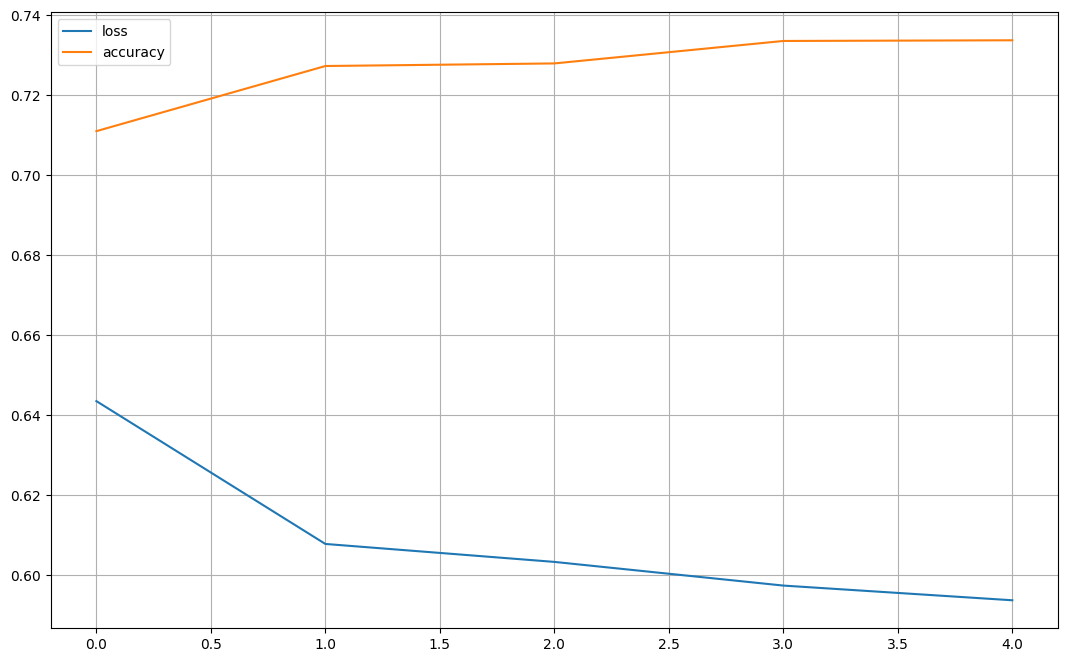

In [49]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(13,8))
plt.grid(True)
plt.show()

Все примерно одинаковы

In [41]:
#предсказание
y_pred = model.predict(X_test)

#метки класса
y_classes = y_pred.argmax(axis=-1)
y_classes[:10]

226/226 [==============================] - 1s 2ms/step


array([2, 0, 2, 2, 0, 0, 0, 0, 2, 0])

In [42]:
#декодинг меток в название категорий
le.inverse_transform(y_classes[:10])

array(['Норм пойло', 'Вери гуд бухлишко', 'Норм пойло', 'Норм пойло',
       'Вери гуд бухлишко', 'Вери гуд бухлишко', 'Вери гуд бухлишко',
       'Вери гуд бухлишко', 'Норм пойло', 'Вери гуд бухлишко'],
      dtype=object)

In [43]:
y_test_old=y_test.argmax(axis=-1)

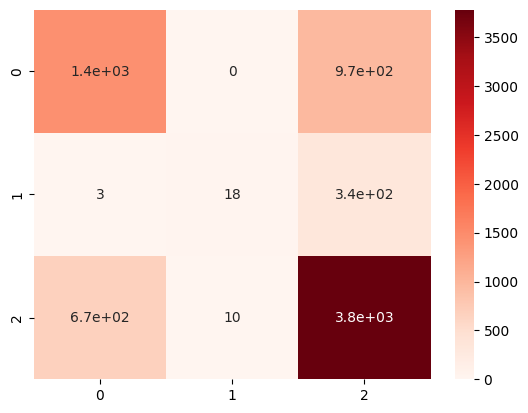

In [44]:
#матрица путаницы
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test_old, y_classes)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds')

In [45]:
cf_matrix

array([[1445,    0,  970],
       [   3,   18,  335],
       [ 670,   10, 3780]])

In [46]:
import pickle
with open('lable_encoder.pkl', 'wb') as fp:
    pickle.dump(le,fp)
with open('scaler.pkl', 'wb') as fp:
    pickle.dump(scaler,fp)
with open('model.pkl','wb') as fp:
    pickle.dump(model,fp)

In [ ]:
import copy

def predict_data(dat):
    x=copy.deepcopy(dat)
    with open('lable_encoder.pkl', 'rb') as fp:
        le = pickle.load(fp)
    with open('scaler.pkl', 'rb') as fp:
        scaler = pickle.load(fp)
    with open('model.pkl','rb') as fp:
        model = pickle.load(fp)
    x.budget.fillna(x.budget.median(),inplace=True)
    x.revenue.fillna(x.revenue.median(),inplace=True)
    x.runtime.fillna(x.runtime.median(),inplace=True)
    x.genre1.fillna(x.genre1.mode(),inplace=True)
    x[['points']] = scaler.fit_transform(x[['points']])
    x['price'] = x['price']. fillna ('Норм пойло')
    x=pd.get_dummies (x, columns=['price'])
    y_pred = model.predict(x)
    y_classes = y_pred.argmax(axis=-1)
    return le.inverse_transform(y_classes)

In [ ]:
y_answer = predict_data(df[['price','points']])

AttributeError: 'DataFrame' object has no attribute 'budget'